# DNN

### 상수 값으로 풀어보는 XOR  예제

![xor_nn_1](https://user-images.githubusercontent.com/661959/54298177-9e82f080-45fb-11e9-8bdd-1f86718c6f5d.png)




In [1]:
import tensorflow as tf
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
Y = np.array([[0], [1], [1], [0]], dtype=np.float32)


W1 = tf.Variable(np.array([[5,-7], [5,-7]], dtype=np.float32), name='weight1')
b1 = tf.Variable(np.array([[-8, 3]], dtype=np.float32), name='bias1')
L1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(np.array([[-11],[-11]], dtype=np.float32), name='weight2')
b2 = tf.Variable(np.array([6], dtype=np.float32), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(L1, W2) + b2)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = np.mean(predicted == Y)

print(f"\nHypothesis:\n{hypothesis} \nPredicted:\n{predicted} \nAccuracy:\n{accuracy}")


Hypothesis:
[[0.01118422]
 [0.99493575]
 [0.99493575]
 [0.02438851]] 
Predicted:
[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:
1.0


#### XOR 문제 MLP 학습 예제
* 앞서 상수로 풀었던 XOR 문제를 MLP 학습으로 해결

In [2]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

W1 = tf.Variable(tf.random.normal([2, 2], seed=0))
b1 = tf.Variable(tf.random.normal([2], seed=0))

W2 = tf.Variable(tf.random.normal([2, 1], seed=0))
b2 = tf.Variable(tf.random.normal([1], seed=0))

lr = 0.1
for step in range(10001):
    with tf.GradientTape() as tape:
        layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
        hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
        cost = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y, hypothesis))
        d_W1, d_b1, d_W2, d_b2 = tape.gradient(cost, [W1, b1, W2, b2] )
        W1.assign_sub(d_W1 * lr)
        b1.assign_sub(d_b1 * lr)
        W2.assign_sub(d_W2 * lr)
        b2.assign_sub(d_b2 * lr)
        if step % 500 == 0:
            print(f"step:{step},\t cost:{cost}")

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = np.mean(predicted == Y)

print(f"Hypothesis:{hypothesis} \nPredicted:{predicted} \nAccuracy:{accuracy}")
print(f"w1:{W1.numpy()}, b1:{b1.numpy()}, w2:{W2.numpy()}, b2{b2.numpy()}")


step:0,	 cost:0.694770336151123
step:500,	 cost:0.6929008960723877
step:1000,	 cost:0.6907983422279358
step:1500,	 cost:0.685660719871521
step:2000,	 cost:0.6681322455406189
step:2500,	 cost:0.6143726110458374
step:3000,	 cost:0.5017193555831909
step:3500,	 cost:0.30418744683265686
step:4000,	 cost:0.16250857710838318
step:4500,	 cost:0.10023446381092072
step:5000,	 cost:0.07013193517923355
step:5500,	 cost:0.053208690136671066
step:6000,	 cost:0.042575158178806305
step:6500,	 cost:0.03534673899412155
step:7000,	 cost:0.030143622308969498
step:7500,	 cost:0.0262334942817688
step:8000,	 cost:0.023195087909698486
step:8500,	 cost:0.02077030949294567
step:9000,	 cost:0.018792884424328804
step:9500,	 cost:0.01715102791786194
step:10000,	 cost:0.015767036005854607
Hypothesis:[[0.01526494]
 [0.97919655]
 [0.9864208 ]
 [0.01290687]] 
Predicted:[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:1.0
w1:[[ 6.0491767  6.1225863]
 [-5.7602525 -6.277827 ]], b1:[ 2.8576002 -3.3210492], w2:[[-9.3568  ]
 [ 9.868228]]

### Optimizer 적용

In [3]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

W1 = tf.Variable(tf.random.normal([2, 2], seed=0))
b1 = tf.Variable(tf.random.normal([2], seed=0))

W2 = tf.Variable(tf.random.normal([2, 1], seed=0))
b2 = tf.Variable(tf.random.normal([1], seed=0))

lr = 0.001
opt = tf.keras.optimizers.Adam(lr)
for step in range(5001):
    with tf.GradientTape() as tape:
        layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
        hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
        cost = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y, hypothesis))
        d_W1, d_b1, d_W2, d_b2 = tape.gradient(cost, [W1, b1, W2, b2] )
        
        opt.apply_gradients(zip([d_W1, d_b1, d_W2, d_b2], [W1, b1, W2, b2]))
        if step % 500 == 0:
            print(f"step:{step},\t cost:{cost}")

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = np.mean(predicted == Y)

print(f"Hypothesis:{hypothesis} \nPredicted:{predicted} \nAccuracy:{accuracy}")
print(f"w1:{W1.numpy()}, b1:{b1.numpy()}, w2:{W2.numpy()}, b2{b2.numpy()}")


step:0,	 cost:0.694770336151123
step:500,	 cost:0.6866353750228882
step:1000,	 cost:0.6217808723449707
step:1500,	 cost:0.471737265586853
step:2000,	 cost:0.352585107088089
step:2500,	 cost:0.2675662338733673
step:3000,	 cost:0.2067776322364807
step:3500,	 cost:0.1624653935432434
step:4000,	 cost:0.12943843007087708
step:4500,	 cost:0.10430711507797241
step:5000,	 cost:0.08483588695526123
Hypothesis:[[0.08504654]
 [0.9485382 ]
 [0.8875339 ]
 [0.07533169]] 
Predicted:[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:1.0
w1:[[ 4.9851465  5.509847 ]
 [-4.804453  -5.8524785]], b1:[ 3.0071902 -2.8788586], w2:[[-6.8803034]
 [ 5.4160385]], b2[3.8919454]


## Keras로 XOR 문제 해결하기


In [4]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([0, 1, 1, 0], dtype=np.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation=tf.sigmoid, input_shape=(2,)),
    tf.keras.layers.Dense(1, activation=tf.sigmoid)
])
model.summary()
opt = tf.keras.optimizers.Adam()
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=opt,
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model.fit(X, y, epochs=5000, verbose=0)
model.evaluate(X, y)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 143ms/step - loss: 0.2212 - binary_accuracy: 1.0000


[0.22117459774017334, 1.0]

### Keras 문자열 설정 실습 – XOR 문제

In [1]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([0, 1, 1, 0], dtype=np.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X, y, epochs=5000, verbose=0)
model.evaluate(X, y)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 111ms/step - loss: 0.0965 - accuracy: 1.0000


[0.0964551568031311, 1.0]

In [6]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-5.2121153, -5.172902 ],
        [ 4.3940635,  4.151123 ]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32, numpy=array([-3.5406406, -3.449092 ], dtype=float32)>,
 <tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[2.7173622],
        [2.9893687]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([-0.71435183], dtype=float32)>]

## 회귀 문제 실습 – 보스턴 주택 가격

In [14]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
print(X_train.shape, X_test.shape)
print(X_train[0])

mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std 

X_test -=mean 
X_test /=std
print(X_train[0])

model = models.Sequential()
model.add(layers.Dense(64, activation='relu'
               , input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])

history = model.fit(X_train, y_train ,epochs =50, batch_size=50, validation_split=0.2)
model.evaluate(X_test, y_test)

(404, 13) (102, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
Epoch 1/50
7/7 [==============================] - 1s 25ms/step - loss: 545.4971 - mae: 21.4531 - val_loss: 586.9987 - val_mae: 22.3739
Epoch 2/50
7/7 [==============================] - 0s 9ms/step - loss: 502.0697 - mae: 20.3607 - val_loss: 543.4505 - val_mae: 21.3564
Epoch 3/50
7/7 [==============================] - 0s 8ms/step - loss: 460.0361 - mae: 19.2891 - val_loss: 496.8575 - val_mae: 20.2411
Epoch 4/50
7/7 [==============================] - 0s 8ms/step - loss: 415.1350 - mae: 18.0995 - val_loss: 445.7097 - val_mae: 18.9819
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 366.2819 - mae: 16.7552 - val_loss: 390.9045 - val_mae: 17.5726
Epoch 6/50
7/7 [=====

[22.662094116210938, 3.113893747329712]

In [15]:
model.predict([[-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266,  -0.1764426,
  0.81306188,  0.1166983,  -0.62624905, -0.59517003,  1.14850044,  0.44807713,
  0.8252202 ]])

array([[15.546822]], dtype=float32)

In [11]:
print(y_train[0])

15.2


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


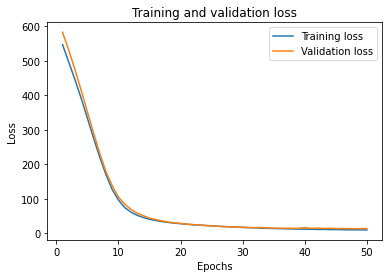

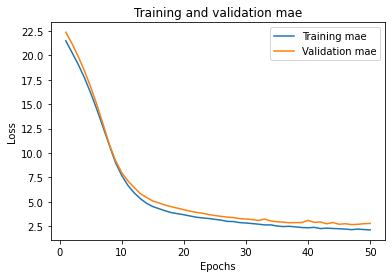

In [8]:
import matplotlib.pyplot as plt

print(history.history.keys())
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(epochs, mae, label='Training mae')
plt.plot(epochs, val_mae, label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### 이진분류 실습 -  IMDB

In [9]:
from tensorflow.keras.datasets import imdb

(train_data, y_train), (test_data, y_test) = imdb.load_data(num_words = 10000)
print(train_data.shape, test_data.shape)

17464789/17464789 [==============================] - 1s 0us/step
(25000,) (25000,)


In [10]:
print(train_data[:2])
print(y_train[:2])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [11]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])
decoded_review

1641221/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [12]:
import numpy as np

# 10000개의 단어 중에 review sample에서 사용한 단어만 1로 채우기
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer = 'rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train,
                   epochs=20, batch_size=512,
                   validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                160016    
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
40/40 [==============================] - 2s 23ms/step - loss: 0.4813 - accuracy: 0.8063 - val_loss: 0.3918 - val_accuracy: 0.8492
Epoch 2/20
40/40 [==============================] - 1s 15ms/step - loss: 0.2856 - accuracy: 0.9073 - val_loss: 0.3175 - val_accuracy: 0.8720
Epoch 3/20
40/40 [============

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 시각화로 과적합 확인

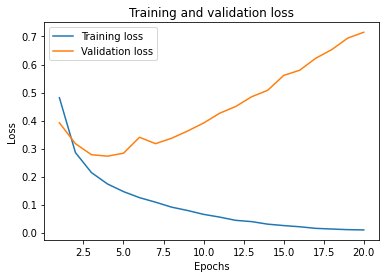

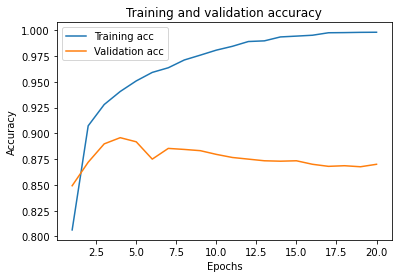

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Callback

In [16]:
import datetime
class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        print('Training: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

    def on_train_batch_end(self, batch, logs=None):
        print('Training: batch {} ends at {}'.format(batch, datetime.datetime.now().time()))

    def on_test_batch_begin(self, batch, logs=None):
        print('Evaluating: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

    def on_test_batch_end(self, batch, logs=None):
        print('Evaluating: batch {} ends at {}'.format(batch, datetime.datetime.now().time()))

cb = MyCustomCallback()
x = np.arange(10)
y = x * 2
    
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='mse')    
model.fit(x,y, callbacks=[cb])
model.evaluate(x,y, callbacks=[cb])

Training: batch 0 begins at 08:23:49.382225
Training: batch 0 ends at 08:23:50.175849
1/1 [==============================] - 1s 796ms/step - loss: 108.4596
Evaluating: batch 0 begins at 08:23:50.244340
Evaluating: batch 0 ends at 08:23:50.323175
1/1 [==============================] - 0s 98ms/step - loss: 108.1755


108.17546081542969

#### EarlyStopping Callback 적용

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
             metrics=['accuracy'])
cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
model.fit(X_train, y_train, epochs=20, batch_size=512, callbacks=[cb],  validation_split=0.2)
results = model.evaluate(X_test, y_test)

Epoch 1/20
40/40 [==============================] - 2s 32ms/step - loss: 0.4853 - accuracy: 0.7831 - val_loss: 0.3169 - val_accuracy: 0.8858
Epoch 2/20
40/40 [==============================] - 1s 29ms/step - loss: 0.2684 - accuracy: 0.8980 - val_loss: 0.3222 - val_accuracy: 0.8738
Epoch 3/20
40/40 [==============================] - 1s 28ms/step - loss: 0.2037 - accuracy: 0.9227 - val_loss: 0.2848 - val_accuracy: 0.8930
Epoch 4/20
40/40 [==============================] - 1s 26ms/step - loss: 0.1566 - accuracy: 0.9434 - val_loss: 0.3086 - val_accuracy: 0.8840
Epoch 5/20
782/782 [==============================] - 2s 2ms/step - loss: 0.3718 - accuracy: 0.8634


### 다항 분류 실습 -  MNIST 손글씨
#### Data loading

<class 'tuple'> 2
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[5 0 4 1 9]


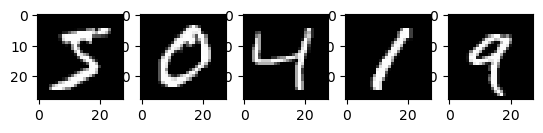

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist.load_data()
print(type(mnist), len(mnist))

(X_train, y_train), (X_test, y_test) = mnist
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(y_train[:5])
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i], cmap="gray")


In [2]:
y_train[0]

5

In [11]:
X_train.reshape(X_train.shape[0],784)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

#### Data preprocessing
* 정규화(Normalization)
    * 픽셀 데이타 : 0 ~ 255
    * 정규화 데이타 : 0 ~ 1  
* 2차원 이미지를 1차원으로 변경
    * (28,28)
    * (784)

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
(X_train, X_test) = (np.float32(X_train)/255, np.float32(X_test)/255)

n_input = 28*28
(X_train, X_test) = (X_train.reshape(-1, n_input), X_test.reshape(-1, n_input))

#### Neural Net 설계
* 입력 : 28*28
* layer1 : 300
* layer2 : 100
* 출력 : 10

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(28*28,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')])
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=10,
                    validation_split=0.2)

test_scores = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
480/480 [==============================] - 2s 3ms/step - loss: 0.4026 - accuracy: 0.8816 - val_loss: 0.1452 - val_accuracy: 0.9572
Epoch 2/10
480/480 [==============================] - 1s 2ms/step - loss: 0.1645 - accuracy: 0.9535 - val_

#### 직접 쓴 숫자 prediction

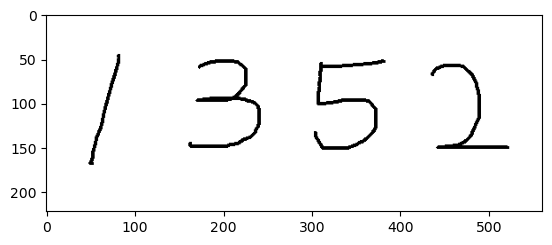

[[6.4460459e-05 2.7792333e-02 2.6543808e-01 7.0565850e-01 1.6668539e-04
  1.1371662e-04 2.8634520e-06 5.2286749e-04 1.8097633e-04 5.9522899e-05]] [3]
[[2.8429963e-07 3.2517186e-05 7.8539770e-06 1.7820647e-02 3.2604068e-05
  9.6703523e-01 3.4253387e-06 2.0634912e-05 5.3455320e-04 1.4512169e-02]] [5]
[[8.0508278e-10 5.1018862e-05 7.4155187e-06 9.9957937e-01 3.1842157e-07
  3.1475438e-04 1.5910825e-09 4.8096945e-06 3.2275322e-05 1.0037725e-05]] [3]
[[0.00161795 0.86471367 0.00873864 0.00819741 0.01171354 0.00653025
  0.00559463 0.02904838 0.05787436 0.00597112]] [1]


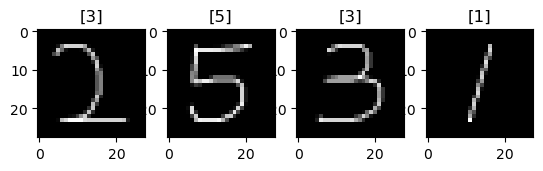

In [8]:
import numpy as np
import cv2
import img2data

img_path = './1352.png'

image = cv2.imread(img_path)
plt.imshow(image)
plt.show()

numbers = img2data.img2digits(image, (28,28), border=4)
for i, n in enumerate(numbers):
    pred = model.predict(n.astype(np.float32)/255.0)
    pred_label = np.argmax(pred, axis=1)
    print(pred, pred_label)
    plt.subplot(1, len(numbers), i+1)
    plt.title(str(pred_label))
    plt.imshow(n.reshape(28,28), cmap="gray")